In [1]:
%pylab
%matplotlib inline

/home/main/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from string import Template
import tempfile
import shutil
import os
import pylhe
import gzip
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
import numpy as np

In [7]:
inputdir = 'inputdir'
workdir = 'workdir'
for x in [inputdir,workdir]:
    if os.path.exists(x):
        shutil.rmtree(x)

import urllib2
from StringIO import StringIO
inputfile = StringIO(urllib2.urlopen(
                'https://github.com/lukasheinrich/weinberg-exp/raw/master/example_yadage/input.zip'
            ).read())
import zipfile
zipfile.ZipFile(inputfile).extractall(path = inputdir)

In [8]:
!ls inputdir

proc_card_ppee.dat  run_card.templ  sm_proc_card.templ


In [9]:
runcardtemp = tempfile.NamedTemporaryFile()
runcardtemp.write(
    Template(open('{}/run_card.templ'.format(inputdir)).read()).substitute(
                __SQRTSHLF__ = 45.0,
                __POLBEAM1__ = 0,
                __POLBEAM2__ = 0
            )
)
runcardtemp.name

'/tmp/tmpAPCrcp'

In [11]:
contents = '''
{process}
output {workdir}
launch -n output
{runcard}
set nevents {nevents}
quit
'''.format(
    process = Template(open('{}/sm_proc_card.templ'.format(inputdir)).read()).substitute(
                __PROCESS__ = 'e+ e- > mu+ mu-',
                __OUTPUT__ = workdir
            ),
    workdir = workdir,
    runcard = runcardtemp.name,
    nevents = 10000
)

with open('madgraph.run','w') as steering_file:
    steering_file.write(contents)
steering_file.name

'madgraph.run'

In [12]:
import shlex
import subprocess
subprocess.check_call(shlex.split('mg5 -f {}'.format(steering_file.name)))

0

In [13]:
costhetas = []
for i,e in enumerate(pylhe.readLHE(gzip.open('{}/Events/output/unweighted_events.lhe.gz'.format(workdir)))):
    els = [p for p in e['particles'] if p['id'] == 11]
    mus = [p for p in e['particles'] if p['id'] == 13]
    assert len(mus) == 1
    assert len(els) == 1
    mu = mus[0]
    el = els[0]
    el_px, el_py, el_pz = [el[x] for x in ['px','py','pz']]
    mu_px, mu_py, mu_pz = [mu[x] for x in ['px','py','pz']]
    costheta = mu_pz/el_pz
    costhetas.append(costheta)

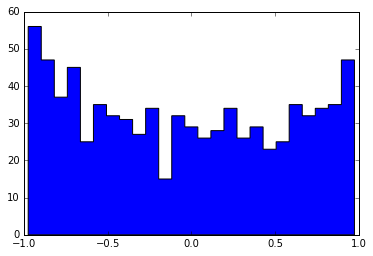

In [14]:
_,_,_ = plt.hist(costhetas, bins = 25, histtype='stepfilled')
